# A Real Dataset

# Getting the dataset ready

## Downloading

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt 
import cv2
from config import *

In [2]:
# Download the data 
if not mnist_name in os.listdir(DATASETS_DIR):

    import urllib
    import urllib.request

    file_name = f'{DATASETS_DIR.joinpath(f"{mnist_name}.zip")}'
    
    # Dowloading
    print(f'Downloading as {DATASETS_DIR.joinpath(mnist_name)}.zip from {mnist_url}....')
    urllib.request.urlretrieve(mnist_url, file_name, )
    print('Successfully Downloaded')

    #Unzip zip file
    from zipfile import ZipFile

    print(f'Unzipping {mnist_name}.zip....')
    with ZipFile(file_name) as files:
        files.extractall(DATASETS_DIR.joinpath(mnist_name))
    print('Successfully Unzipped')

    # delete zip file
    print('Deleting zip file....')
    os.remove(file_name)
    print('Done')
else:
    print('Folder already in', DATASETS_DIR)

Folder already in c:\Users\ydine\Documents\numpyml\nnfs\datasets


## Loading the data to memory

In [3]:
data = {}

for st in os.listdir(DATASETS_DIR.joinpath(mnist_name))[1:]:
    data[st] = {
        'labels' : [],
        'images' : []
    }
    for label in os.listdir(DATASETS_DIR.joinpath(mnist_name).joinpath(st)):
        for image in os.listdir(DATASETS_DIR.joinpath(mnist_name).joinpath(st).joinpath(label)):
            data[st]['labels'].append(label)
            data[st]['images'].append(cv2.imread(
                DATASETS_DIR.joinpath(mnist_name).joinpath(st).joinpath(label).joinpath(image),
                cv2.IMREAD_UNCHANGED
                ))
    data[st]['labels'] = np.array(data[st]['labels']).astype(np.uint8)
    data[st]['images'] = np.array(data[st]['images'])

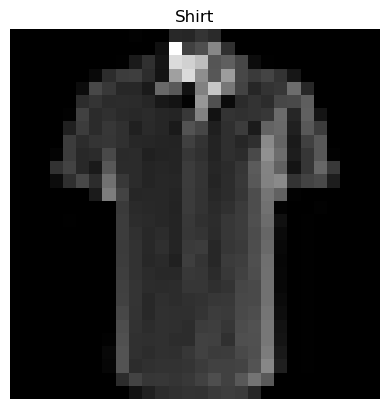

In [4]:
img = np.random.randint(0,len(data['train']['labels']))

plt.figure()
plt.title(mnist_labels[int(data['train']['labels'][img])])
plt.imshow(data['train']['images'][img], cmap=plt.cm.gray)
plt.axis(False)
plt.show()

## Splitting the data

In [5]:
X_train, y_train, X_test, y_test = data['train']['images'],data['train']['labels'],data['test']['images'],data['test']['labels']

## Rescaling the data

In [6]:
X_train = (X_train.astype(np.float32)/127.5) - 1
X_test = (X_test.astype(np.float32)/127.5) - 1

In [7]:
X_train.dtype

dtype('float32')

In [8]:
X_train.min(), X_train.max()

(-1.0, 1.0)

## Flattening the data to fit out Dense network

In [9]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

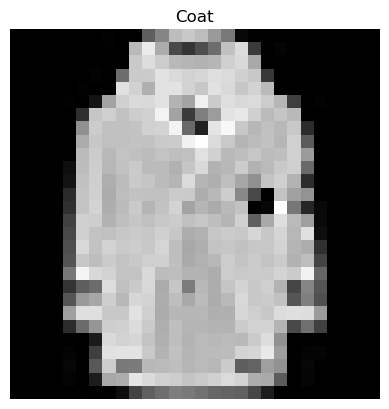

In [10]:
img = np.random.randint(0,60000)


plt.figure()
plt.title(mnist_labels[int(y_train[img])])
plt.imshow(X_train[img].reshape(28,28), cmap=plt.cm.gray)
plt.axis(False)
plt.show()

## Data Shuffling

In [11]:
keys = np.arange(X_train.shape[0])
np.random.shuffle(keys)

In [12]:
X_train_shuffled = X_train[keys]
y_train_shuffled = y_train[keys]

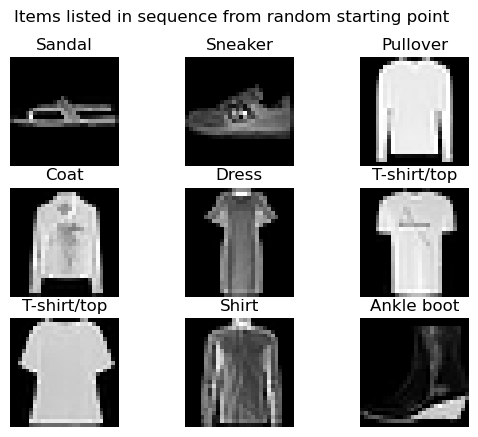

In [13]:
i = np.random.randint(0,60000)

fig, ax = plt.subplots(3,3)
fig.suptitle('Items listed in sequence from random starting point', ha='center')
for img in range(i,i+9):
    ax[(img-i)//3,(img-i)%3].set_title(mnist_labels[int(y_train_shuffled[img])])
    ax[(img-i)//3,(img-i)%3].imshow(X_train_shuffled[img].reshape(28,28), cmap=plt.cm.gray)
    ax[(img-i)//3,(img-i)%3].axis(False)
plt.show()

# Modelling

In [14]:
# import the api
import NN

## Create the model

In [15]:
model = NN.Model()
model.add(NN.Dense_Layer(X_train.shape[1], 64))
model.add(NN.ReLU_Activation())
model.add(NN.Dense_Layer(64, 64))
model.add(NN.ReLU_Activation())
model.add(NN.Dense_Layer(64, 10))
model.add(NN.Softmax_Activation())

model.compile(
    optimizer=NN.Adam(decay=5e-5),
    loss=NN.CategoricalCrossentropy(),
    accuracy=NN.Classification_Accuracy()
)

In [16]:
history = model.fit(
    X_train_shuffled,
    y_train_shuffled,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=128
    )

--------------------------------------------------------------------------------------------------------------------------
Epoch : 1 Learning_rate : 0.001


Accuracy : 0.71385 Loss : 0.7621468146607485: 100%|██████████| 469/469 [00:01<00:00, 325.27it/s]           
Validation Accuracy : 0.8041 Validation Loss : 0.5500339758305391: 100%|██████████| 79/79 [00:00<00:00, 874.07it/s]   


Training Accuracy : 0.71385 Training Loss 0.7621468146607485 Training Data Loss : 0.7621468146607485 Regularization Loss: 0
Validation Accuracy : 0.8041 Validation Loss : 0.5500339758305391
--------------------------------------------------------------------------------------------------------------------------
Epoch : 2 Learning_rate : 0.0009771350400625365


Accuracy : 0.8312666666666667 Loss : 0.46512700539130813: 100%|██████████| 469/469 [00:01<00:00, 275.83it/s]
Validation Accuracy : 0.8289 Validation Loss : 0.4785776778211086: 100%|██████████| 79/79 [00:00<00:00, 654.93it/s]             


Training Accuracy : 0.8312666666666667 Training Loss 0.46512700539130813 Training Data Loss : 0.46512700539130813 Regularization Loss: 0
Validation Accuracy : 0.8289 Validation Loss : 0.4785776778211086
--------------------------------------------------------------------------------------------------------------------------
Epoch : 3 Learning_rate : 0.0009552466924583273


Accuracy : 0.8515333333333334 Loss : 0.4096339104992785: 100%|██████████| 469/469 [00:01<00:00, 271.00it/s] 
Validation Accuracy : 0.8395 Validation Loss : 0.44549317374448755: 100%|██████████| 79/79 [00:00<00:00, 835.79it/s]  


Training Accuracy : 0.8515333333333334 Training Loss 0.4096339104992785 Training Data Loss : 0.4096339104992785 Regularization Loss: 0
Validation Accuracy : 0.8395 Validation Loss : 0.44549317374448755
--------------------------------------------------------------------------------------------------------------------------
Epoch : 4 Learning_rate : 0.000934317481080071


Accuracy : 0.86205 Loss : 0.378443385847673: 100%|██████████| 469/469 [00:02<00:00, 182.31it/s]             
Validation Accuracy : 0.8458 Validation Loss : 0.4246221927500371: 100%|██████████| 79/79 [00:00<00:00, 504.61it/s]             


Training Accuracy : 0.86205 Training Loss 0.378443385847673 Training Data Loss : 0.378443385847673 Regularization Loss: 0
Validation Accuracy : 0.8458 Validation Loss : 0.4246221927500371
--------------------------------------------------------------------------------------------------------------------------
Epoch : 5 Learning_rate : 0.0009142857142857143


Accuracy : 0.8705833333333334 Loss : 0.3560943679047562: 100%|██████████| 469/469 [00:03<00:00, 143.84it/s] 
Validation Accuracy : 0.8512 Validation Loss : 0.41073092364346003: 100%|██████████| 79/79 [00:00<00:00, 479.41it/s]            

Training Accuracy : 0.8705833333333334 Training Loss 0.3560943679047562 Training Data Loss : 0.3560943679047562 Regularization Loss: 0
Validation Accuracy : 0.8512 Validation Loss : 0.41073092364346003


In [17]:
def plot_history(history):
    import pandas as pd
    hd = pd.DataFrame(history)

    fig,axx = plt.subplots(2,2,figsize=(10,7))
    fig.suptitle('Training History data')
    gs = axx[1,0].get_gridspec()
    axx[0,0].set_title('Accuracies')
    hd[['accuracies', 'val_accuracies']].plot(ax=axx[0,0])
    axx[0,1].set_title('Losses')
    hd[['losses', 'val_losses']].plot(ax=axx[0,1])
    axx[1,0].remove()
    axx[1,1].remove()
    bigax = fig.add_subplot(gs[1,:])
    bigax.set_title('Learning Rate Curve')
    hd['learning_rates'].plot(c='g', ax=bigax)
    plt.legend()
    plt.show()

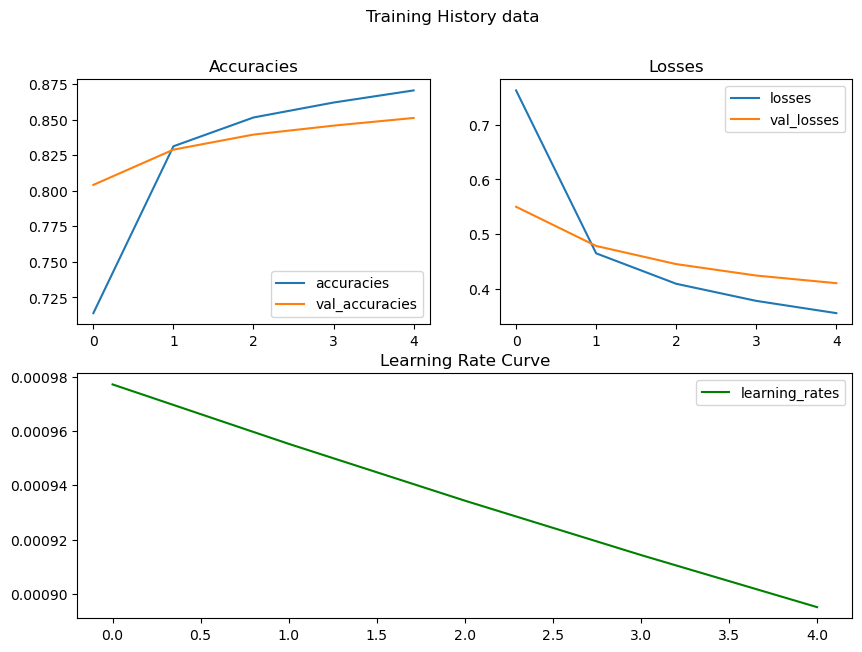

In [18]:
plot_history(history)

## Importance of shuffling

--------------------------------------------------------------------------------------------------------------------------
Epoch : 1 Learning_rate : 0.001


Accuracy : 0.38745 Loss : 2.3458425406240386: 100%|██████████| 469/469 [00:02<00:00, 157.98it/s]            
Validation Accuracy : 0.1012 Validation Loss : 2.9905395669416706: 100%|██████████| 79/79 [00:00<00:00, 858.30it/s]     


Training Accuracy : 0.38745 Training Loss 2.3458425406240386 Training Data Loss : 2.3458425406240386 Regularization Loss: 0
Validation Accuracy : 0.1012 Validation Loss : 2.9905395669416706
--------------------------------------------------------------------------------------------------------------------------
Epoch : 2 Learning_rate : 0.0009771350400625365


Accuracy : 0.4862666666666667 Loss : 1.9400059336111337: 100%|██████████| 469/469 [00:01<00:00, 369.74it/s] 
Validation Accuracy : 0.1001 Validation Loss : 4.444172214229668: 100%|██████████| 79/79 [00:00<00:00, 866.91it/s]       


Training Accuracy : 0.4862666666666667 Training Loss 1.9400059336111337 Training Data Loss : 1.9400059336111337 Regularization Loss: 0
Validation Accuracy : 0.1001 Validation Loss : 4.444172214229668
--------------------------------------------------------------------------------------------------------------------------
Epoch : 3 Learning_rate : 0.0009552466924583273


Accuracy : 0.4902166666666667 Loss : 1.5478783551896518: 100%|██████████| 469/469 [00:01<00:00, 290.48it/s] 
Validation Accuracy : 0.1052 Validation Loss : 4.035624053898027: 100%|██████████| 79/79 [00:00<00:00, 565.50it/s]                 


Training Accuracy : 0.4902166666666667 Training Loss 1.5478783551896518 Training Data Loss : 1.5478783551896518 Regularization Loss: 0
Validation Accuracy : 0.1052 Validation Loss : 4.035624053898027
--------------------------------------------------------------------------------------------------------------------------
Epoch : 4 Learning_rate : 0.000934317481080071


Accuracy : 0.6912 Loss : 1.064286594730896: 100%|██████████| 469/469 [00:02<00:00, 200.34it/s]             
Validation Accuracy : 0.1003 Validation Loss : 7.634603868002887: 100%|██████████| 79/79 [00:00<00:00, 751.08it/s]             


Training Accuracy : 0.6912 Training Loss 1.064286594730896 Training Data Loss : 1.064286594730896 Regularization Loss: 0
Validation Accuracy : 0.1003 Validation Loss : 7.634603868002887
--------------------------------------------------------------------------------------------------------------------------
Epoch : 5 Learning_rate : 0.0009142857142857143


Accuracy : 0.7395333333333334 Loss : 0.9853961440265747: 100%|██████████| 469/469 [00:02<00:00, 191.26it/s]
Validation Accuracy : 0.1307 Validation Loss : 6.067106838259456: 100%|██████████| 79/79 [00:00<00:00, 545.38it/s]               


Training Accuracy : 0.7395333333333334 Training Loss 0.9853961440265747 Training Data Loss : 0.9853961440265747 Regularization Loss: 0
Validation Accuracy : 0.1307 Validation Loss : 6.067106838259456


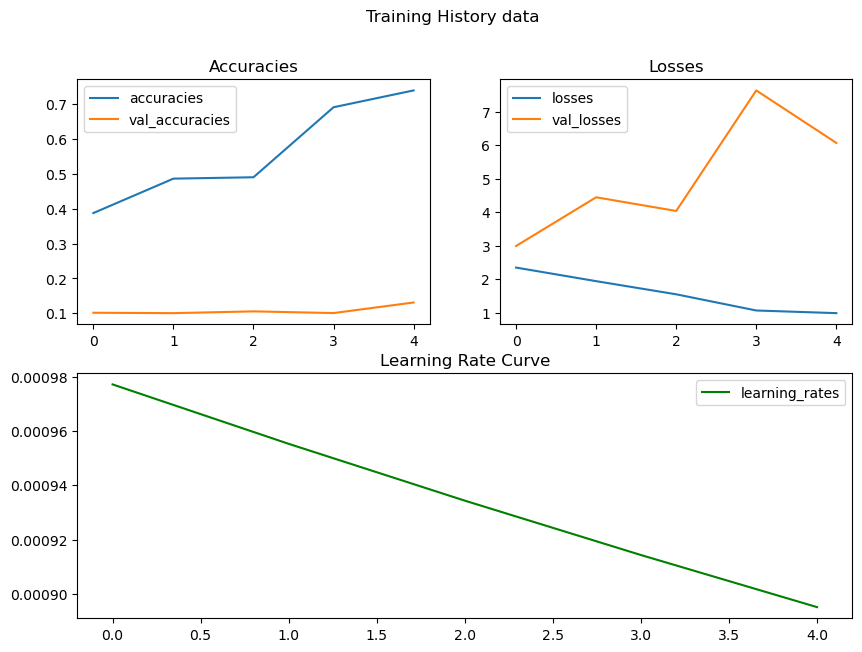

In [19]:
model_bad = NN.Model()
model_bad.add(NN.Dense_Layer(X_train.shape[1], 64))
model_bad.add(NN.ReLU_Activation())
model_bad.add(NN.Dense_Layer(64, 64))
model_bad.add(NN.ReLU_Activation())
model_bad.add(NN.Dense_Layer(64, 10))
model_bad.add(NN.Softmax_Activation())

model_bad.compile(
    optimizer=NN.Adam(decay=5e-5),
    loss=NN.CategoricalCrossentropy(),
    accuracy=NN.Classification_Accuracy()
)

history_bad = model_bad.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=128
    )

plot_history(history_bad)

## Model Evaluation

In [20]:
#After adding evaluation functionality
model.evaluate(X_test,y_test)

Validation Accuracy : 0.8512 Validation Loss : 0.4107309236434599: 100%|██████████| 1/1 [00:00<00:00, 22.98it/s]


(0.4107309236434599, 0.8512)

In [21]:
model_2 = model.clone_model()

In [22]:
model_2.evaluate(X_test,y_test)

Validation Accuracy : 0.8512 Validation Loss : 0.4107309236434599: 100%|██████████| 1/1 [00:00<00:00, 19.28it/s]


(0.4107309236434599, 0.8512)

In [23]:
weights_2 = model_2.get_weights()

In [24]:
model_weights = model.get_weights()

In [25]:
model_2.set_weights(model_weights)

In [26]:
weights_3 = model_2.get_weights()

In [27]:
model_2.evaluate(X_test,y_test)

Validation Accuracy : 0.8512 Validation Loss : 0.4107309236434599: 100%|██████████| 1/1 [00:00<00:00, 18.18it/s]


(0.4107309236434599, 0.8512)

In [28]:
for a,b,c in zip(weights_2,weights_3,model_weights):
    a1,a2 = a
    b1,b2 = b
    c1,c2 = c
    print(np.isclose(a1,b1).mean(),np.isclose(c1,b1).mean(),np.isclose(a1,c1).mean())

1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0


In [29]:
weights_2 = model_2.get_weights()

In [30]:
model.save_model(MAIN_DIR.joinpath('model.model'))

Successfully saved model to c:\Users\ydine\Documents\numpyml\nnfs\model.model


In [31]:
loaded_model = NN.Model.load(MAIN_DIR.joinpath('model.model'))

In [32]:
loaded_model.evaluate(X_test,y_test)

Validation Accuracy : 0.8512 Validation Loss : 0.4107309236434599: 100%|██████████| 1/1 [00:00<00:00, 16.24it/s]


(0.4107309236434599, 0.8512)

In [33]:
preds = model.predict(X_test[:5])

100%|██████████| 1/1 [00:00<00:00, 166.22it/s]


In [34]:
model.predictor.predict(preds)

array([0, 0, 0, 0, 0], dtype=int64)

In [35]:
y_test[:5]

array([0, 0, 0, 0, 0], dtype=uint8)